In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import operator
import random
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

train = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment3/train.json')
test = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment3/test.json')

# Number of recipes
print("Number of recipes : ",len(train))

# Number of cuisines
cuisines = train.cuisine.unique()
print("Number of cuisines : ", len(cuisines))

#Get total number of ingredients from dataset
total_ingre = []
for lst in train['ingredients']:
  total_ingre.extend(lst)
print(len(total_ingre))


nb=(set(total_ingre))
nb_lst = list(nb)
print(len(nb))

Number of recipes :  39774
Number of cuisines :  20
428275
6714


**Question 1 a)**

In [3]:
train_subset = list(train['ingredients'])
len(train_subset)
te = TransactionEncoder()
data = te.fit_transform(train_subset)
data = pd.DataFrame(data, columns = te.columns_)
# dataset = dataset.astype('int')

data.shape

(39774, 6714)

In [4]:
final_itemset = apriori(data, min_support = 0.004, use_colnames = True)

In [5]:
final_itemset['length'] = final_itemset['itemsets'].apply(lambda x: len(x))
final_itemset

,support,itemsets,length
0,0.004852,(1% low-fat milk),1
1,0.004350,(Mexican cheese blend),1
2,0.006638,(Shaoxing wine),1
3,0.007492,(Sriracha),1
4,0.004626,(Tabasco Pepper Sauce),1
...,...,...,...
2846,0.004123,"(salt, sugar, soy sauce, sesame oil)",4
2847,0.004551,"(salt, sugar, baking powder, all-purpose flour...",5
2848,0.004651,"(unsalted butter, salt, sugar, all-purpose flo...",5
2849,0.004827,"(olive oil, salt, garlic, onions, pepper)",5


**Question 1 b)**

In [6]:
frequent_itemsets_one = final_itemset.loc[final_itemset['length'] == 1]
frequent_itemsets_two = final_itemset.loc[final_itemset['length'] == 2]
frequent_itemsets_three = final_itemset.loc[final_itemset['length'] == 3]
frequent_itemsets_four = final_itemset.loc[final_itemset['length'] == 4]
frequent_itemsets_five = final_itemset.loc[final_itemset['length'] == 5]

frequent_itemsets_one = frequent_itemsets_one.sort_values('support', ascending=False)
frequent_itemsets_two = frequent_itemsets_two.sort_values('support', ascending=False)
frequent_itemsets_three = frequent_itemsets_three.sort_values('support', ascending=False)
frequent_itemsets_four = frequent_itemsets_four.sort_values('support', ascending=False)
frequent_itemsets_five = frequent_itemsets_five.sort_values('support', ascending=False)

In [7]:
print(frequent_itemsets_one)
print(frequent_itemsets_two)
print(frequent_itemsets_three)
print(frequent_itemsets_four)
print(frequent_itemsets_five)

      support               itemsets  length
371  0.453764                 (salt)       1
313  0.200432               (onions)       1
311  0.200407            (olive oil)       1
442  0.187484                (water)       1
201  0.185548               (garlic)       1
..        ...                    ...     ...
298  0.004098                 (mint)       1
59   0.004098     (button mushrooms)       1
393  0.004048  (sliced black olives)       1
409  0.004048   (sun-dried tomatoes)       1
383  0.004023       (sherry vinegar)       1

[461 rows x 3 columns]
       support                         itemsets  length
1740  0.110424                   (salt, onions)       2
1710  0.105018                (olive oil, salt)       2
1865  0.099563                    (salt, water)       2
1779  0.096646                   (pepper, salt)       2
1315  0.094258                   (salt, garlic)       2
...        ...                              ...     ...
1446  0.004023      (green onions, kosher sa

**Question 1 c)** </br>
**Observations**

1. The most used ingredient has the highest support value, thus in accordance with the frequency rank distribution.

2. There are less itemsets for size 1 and 4 but for size 2 and 3 there are more itemsets depicting that their combination is used widely.

3. There are very few itemsets for size 5 showing that if we keep on increasing the size of itemsets there would be very few or there would be no itemsets for higher sizes.

4. The itemsets with size greater than oe equal to 1 have high probability that they have salt which has the highest support value as one of the ingredients.

5. Adding an ingredient that already has a lower support value does not increase the overall support value of the itemset, thus making not making the itemset very usable or popular.



**Question 2**

**Random Control R0**

In [3]:
count =[]
for lst in train['ingredients']:
  count.append(len(lst))

train['recipe_size'] = count

train_sorted = train.sort_values(by=['recipe_size'], ascending=False)

size_lst = []
recipe_lst = []
recipe_id = []
cuisine_lst = []
for index, row in train_sorted.iterrows():
  sizeofrecipe = len(row['ingredients'])
  size_lst.append(sizeofrecipe)
  # print(row['ingredients'])
  # print(sizeofrecipe)
  new_randomrecipe = random.sample(nb_lst, sizeofrecipe)
  recipe_lst.append(new_randomrecipe)
  recipe_id.append(row['id'])
  cuisine_lst.append(row['cuisine'])
  # print(new_randomrecipe)

In [4]:
list_tuples = list(zip(recipe_id, cuisine_lst, recipe_lst, size_lst))
dframe = pd.DataFrame(list_tuples, columns=['id', 'cuisine', 'ingredients', 'recipe_size'])  
   
print(dframe) 

#calculate unique ingredients to find out if the number of ingredients are preserved
count_new =[]
for lst in dframe['ingredients']:
  count_new.extend(lst)
print(len(count_new))

count_new_set = set(count_new)
count_new_lst = list(count_new_set)
print(len (count_new_lst))

          id  ... recipe_size
0       3885  ...          65
1      13430  ...          59
2      13049  ...          52
3      49282  ...          49
4       2253  ...          49
...      ...  ...         ...
39769  12805  ...           1
39770  39221  ...           1
39771  10816  ...           1
39772  39186  ...           1
39773   7833  ...           1

[39774 rows x 4 columns]
428275
6714


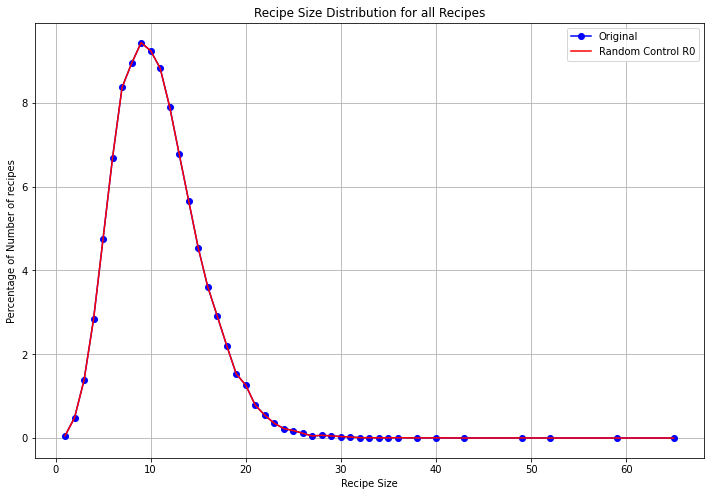

In [19]:
#Original
count =[]
for lst in train['ingredients']:
  count.append(len(lst))

train['recipe_size'] = count
# unique_counts = (train['recipe_size'].explode().value_counts()).values
train['freq'] = ((train.groupby('recipe_size')['recipe_size'].transform('count'))/(len(train)))*100

# for all recipes
recipe_size_data = pd.Series(train.freq.values,index=train.recipe_size).to_dict()

recipe_size_data_sorted = OrderedDict(sorted(recipe_size_data.items()))
recipe_size = list(recipe_size_data_sorted.keys())
recipe_freq = list(recipe_size_data_sorted.values())

#Random
dframe['freq'] = ((dframe.groupby('recipe_size')['recipe_size'].transform('count'))/(len(train)))*100
# train_sorted

# for all recipes
recipe_size_data = pd.Series(dframe.freq.values,index=dframe.recipe_size).to_dict()

recipe_size_data_sorted = OrderedDict(sorted(recipe_size_data.items()))
recipe_size = list(recipe_size_data_sorted.keys())
recipe_freq = list(recipe_size_data_sorted.values())
plt.figure(figsize = (12,8))
plt.plot(recipe_size,recipe_freq, marker = 'o' , label = "Original", color = 'blue')
plt.plot(recipe_size,recipe_freq, marker = '' , label = "Random Control R0", color = 'red')

plt.ylabel("Percentage of Number of recipes")
plt.xlabel("Recipe Size")
plt.title('Recipe Size Distribution for all Recipes')
plt.legend()
plt.grid()
plt.show()

**Random Control R1**

In [22]:
total_ingre =[]
for lst in train['ingredients']:
  total_ingre.extend(lst)
values, counts = np.unique(total_ingre, return_counts=True)

ingre_count = {}
for A, B in zip(values, counts):
    ingre_count[A] = B

ingre_count_sorted = dict( sorted(ingre_count.items(), key=operator.itemgetter(1),reverse=True))
pairs_iterator = iter(ingre_count_sorted.items())
print(type(ingre_count_sorted))


<class 'dict'>


In [ ]:
print(ingre_count_sorted)
train_sorted

In [ ]:
size_lst2 = []
recipe_lst2 = []
recipe_id2 = []
cuisine_lst2 = []
counter = 0
# ing_weights = list(ingre_count_sorted.values())
for index, row in train_sorted.iterrows():
  print("counter :" ,counter)
  random_ingre_lst = []
  sizeofrecipe = len(row['ingredients'])
  size_lst2.append(sizeofrecipe)
  
  i = 0
 
  for key,value in ingre_count_sorted.copy().items(): 
    
    if(ingre_count_sorted[key] == 0) :
      del ingre_count_sorted[key]

  while(i < (sizeofrecipe)):
    # random_ingre = random.choice(nb_lst)
    ing_lst = list(ingre_count_sorted.keys())
    ing_weights = list(ingre_count_sorted.values())
    random_ingre = random.choices(ing_lst, k=1, weights = ing_weights)[0]
    # random_ingre = random.choice(ing_lst)
    
    if((ingre_count_sorted[random_ingre] > 0) & (random_ingre not in random_ingre_lst)):
      # if(random_ingre not in random_ingre_lst):
      ingre_count_sorted[random_ingre] -= 1
      random_ingre_lst.append(random_ingre)
      i += 1

  new_randomrecipe = random_ingre_lst
  # print("recipe : ", new_randomrecipe)
  recipe_lst2.append(new_randomrecipe)
  recipe_id2.append(row['id'])
  cuisine_lst2.append(row['cuisine'])
  counter += 1 

In [26]:
list_tuples2 = list(zip(recipe_id2, cuisine_lst2, recipe_lst2, size_lst2))
dframe2 = pd.DataFrame(list_tuples2, columns=['id', 'cuisine', 'ingredients', 'recipe_size'])  
# 35930   
print(dframe2) 

          id  ... recipe_size
0       3885  ...          65
1      13430  ...          59
2      13049  ...          52
3      49282  ...          49
4       2253  ...          49
...      ...  ...         ...
39769  12805  ...           1
39770  39221  ...           1
39771  10816  ...           1
39772  39186  ...           1
39773   7833  ...           1

[39774 rows x 4 columns]


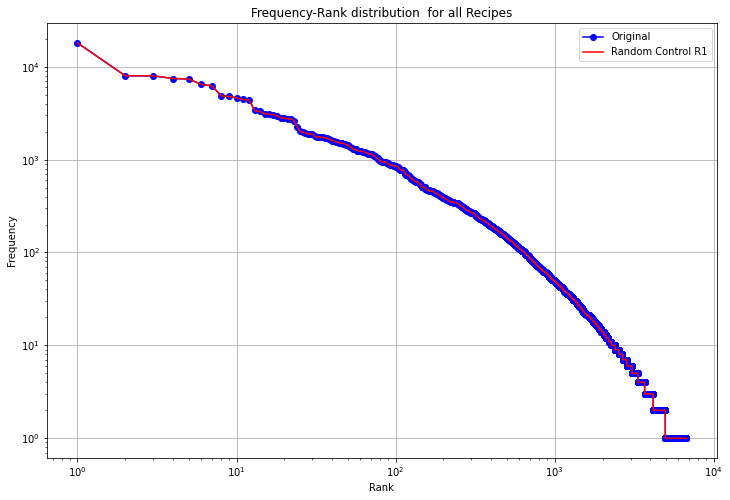

In [27]:
#Orginal
total_ingre =[]
for lst in train['ingredients']:
  total_ingre.extend(lst)
values, counts = np.unique(total_ingre, return_counts=True)
# print(type(counts))
# print(values, counts)
sorted_count = np.sort(counts)[::-1]
rank =1
rank_lst = []
for i in range(sorted_count.shape[0]):
  rank_lst.append(rank)
  rank = rank+1





#Random
total_ingre2 =[]
for lst in dframe2['ingredients']:
  total_ingre2.extend(lst)
values2, counts2 = np.unique(total_ingre2, return_counts=True)

sorted_count2 = np.sort(counts2)[::-1]
rank2 = 1
rank_lst2 = []
for i in range(sorted_count2.shape[0]):
  rank_lst2.append(rank2)
  rank2 = rank2+1

plt.figure(figsize = (12,8))
plt.loglog(rank_lst,sorted_count, marker = 'o',label ="Original", color = 'blue' )
plt.loglog(rank_lst2,sorted_count2, marker = '',label ="Random Control R1" , color = 'red')
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.title('Frequency-Rank distribution  for all Recipes')
plt.legend()
plt.grid()
plt.show()

In [31]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/SEM3/CGAS/Assignment3/CGAS_A3.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SEM3/CGAS/Assignment3/CGAS_A3.ipynb to html
[NbConvertApp] Writing 395235 bytes to /content/drive/MyDrive/SEM3/CGAS/Assignment3/CGAS_A3.html
